In [1]:
from Models.grid_search_utils import GridSearch as Gs
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

EBMReg = Gs.load_model(name="../Models/GlassBox/ebm/saved_models/EBMReg")

In [2]:
test_set_with = pd.read_csv("../outputs/scores/0_dataset_ts.csv")
test_set_without = pd.read_csv("../outputs/scores/1_dataset_ts.csv")

In [3]:
test_result = test_set_with[["qId","kId"]].copy()
test_result["output_with"] = EBMReg.predict(test_set_with.iloc[:,5:].to_numpy())
test_result["output_without"] = EBMReg.predict(test_set_without.iloc[:,5:].to_numpy())

In [4]:
job_offer = test_result[test_result["qId"] == 18].iloc[:,1:].copy().set_index("kId")
job_offer = job_offer.sort_index()
job_offer["ax0"] = 0
job_offer["ax1"] = 1

In [5]:
job_offer["rank_with"] = job_offer["output_with"].rank(method="first", ascending=False)
job_offer["rank_without"] = job_offer["output_without"].rank(method="first", ascending=False)

In [6]:
job_offer["diff"] = job_offer["rank_without"] - job_offer["rank_with"]

In [7]:
job_offer = job_offer.sort_values(by="rank_with").head(15)

In [8]:
job_offer

,output_with,output_without,ax0,ax1,rank_with,rank_without,diff
kId,,,,,,,
1553,71.713147,56.138597,0,1,1.0,2.0,1.0
1564,62.750680,47.592040,0,1,2.0,7.0,5.0
1521,60.588823,57.209140,0,1,3.0,1.0,-2.0
1543,60.290551,42.572556,0,1,4.0,17.0,13.0
1512,58.845148,49.037474,0,1,5.0,4.0,-1.0
1569,56.970641,48.043412,0,1,6.0,5.0,-1.0
1524,55.378001,45.057969,0,1,7.0,10.0,3.0
1562,55.378001,52.122155,0,1,8.0,3.0,-5.0
1545,54.647864,42.425249,0,1,9.0,19.0,10.0


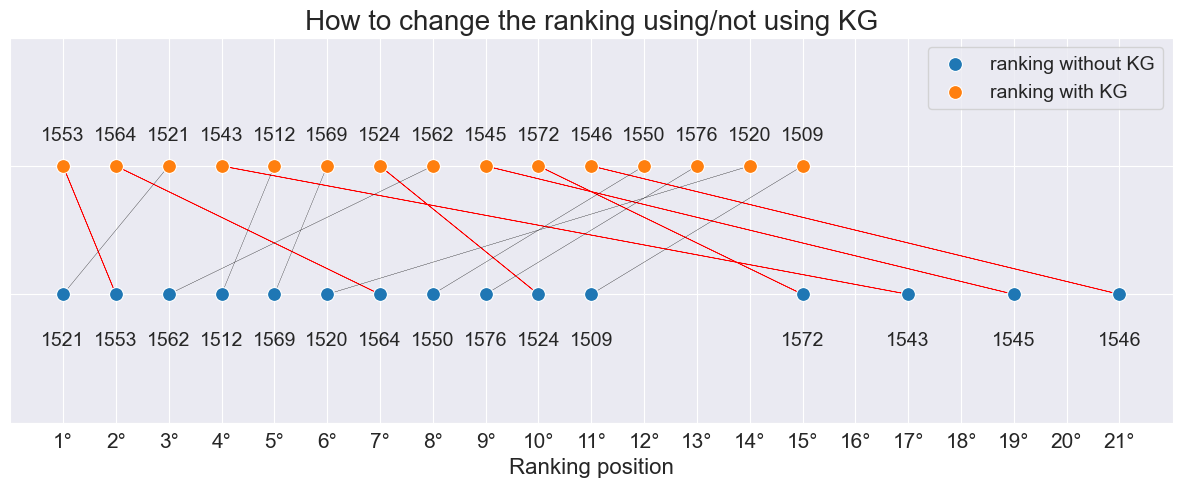

In [9]:
sns.set_style("darkgrid")

_, axs = plt.subplots(figsize=(15, 5))

for kId in job_offer.index:
    pred_without = job_offer.loc[kId,"rank_without"]
    pred_with = job_offer.loc[kId,"rank_with"]
    diff = job_offer.loc[kId,"diff"]
    axs.text(pred_without, job_offer.loc[kId, "ax0"] - 0.4, kId, horizontalalignment='center', size=14)
    axs.text(pred_with, job_offer.loc[kId, "ax1"] + 0.2, kId, horizontalalignment='center', size=14)
    
    color = "Red" if diff > 0 else "Black"
    line_width = 0.5 if diff > 0 else 0.08
    axs.arrow(pred_with,1, diff, -1, linewidth=line_width, color=color)
    
sns.scatterplot(y="ax0", x="rank_without", data=job_offer, s=100, ax=axs, label="ranking without KG")
sns.scatterplot(y="ax1", x="rank_with", data=job_offer, s=100, ax=axs, label="ranking with KG")

axs.set_yticks([-1,0,1,2])

last_pos = int(job_offer["rank_without"].max()) + 1
axs.set_xticks([*range(1,last_pos)],[str(i)+"°" for i in range(1,last_pos)])
axs.tick_params(axis='both', labelsize=15, labelleft=False)
axs.set_ylabel("")
axs.set_xlabel("Ranking position",fontsize=16)
axs.set_title("How to change the ranking using/not using KG", fontsize=20)
axs.grid(True)
axs.legend(fontsize=14)
plt.show()

In [10]:
display(test_set_without[test_set_without["kId"] == 1451].iloc[:,13:17])
display(test_set_with[test_set_with["kId"] == 1451].iloc[:,13:17])

,fitness_comp_basic,fitness_comp_bonus,fitness_know_basic,fitness_knowl_bonus
2053,0.5,0.0,0.0,0.0


,fitness_comp_basic,fitness_comp_bonus,fitness_know_basic,fitness_knowl_bonus
2053,0.541169,0.067405,1.0,0.113753


In [11]:
curricula = pd.read_csv("../outputs/0_curricula.csv")
job_offer = pd.read_csv("../outputs/0_job_offers.csv")

In [12]:
curricula[curricula["kId"]==1451].iloc[:,7:21].to_dict()

{'Competences0': {1451: 'repair electronic components'},
 'Competences1': {1451: 'undertake automated process control'},
 'Competences2': {1451: 'meet deadlines'},
 'Competences3': {1451: 'manage data lifecycle'},
 'Competences4': {1451: 'clean parts during assembly'},
 'Competences5': {1451: '-'},
 'Competences6': {1451: '-'},
 'Knowledge0': {1451: 'printing techniques'},
 'Knowledge1': {1451: 'assembled printed circuit board'},
 'Knowledge2': {1451: 'hybrid integrated circuit'},
 'Knowledge3': {1451: 'electromechanics'},
 'Knowledge4': {1451: 'electronics for consumers'},
 'Knowledge5': {1451: 'circuit blueprints'},
 'Knowledge6': {1451: 'automation technology'}}

In [13]:
job_offer[job_offer["qId"]==18].iloc[:,8:22].to_dict()

{'Competence_essential0': {18: 'perform scientific research'},
 'Competence_essential1': {18: 'solve technical requirements'},
 'Competence_essential2': {18: 'define technical requirements'},
 'Competence_essential3': {18: 'analyze  production processes for improvement'},
 'Competence_optional0': {18: 'use CAD software'},
 'Competence_optional1': {18: 'consult with the project and design team'},
 'Competence_optional2': {18: 'conduct performance tests'},
 'Knowledge_essential0': {18: 'manufacturing processes'},
 'Knowledge_essential1': {18: 'engineering processes'},
 'Knowledge_essential2': {18: 'engineering principles'},
 'Knowledge_essential3': {18: '-'},
 'Knowledge_optional0': {18: 'environmental engineering'},
 'Knowledge_optional1': {18: '-'},
 'Knowledge_optional2': {18: '-'}}